# Homework Data Visualization

$\textbf{Ubah nama di bawah yaa!}$

- Nama: Zalfa' Putri Nabilah
- Group: Group 1
- Lagu Favorit: Interaksi - Tulus

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# please import as much as you need
# import googl drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
url = '/content/drive/MyDrive/Colab Notebooks/MSIB/Pengenalan Python untuk Data Science/PDA_DataSource/Data Visualization/telco_customer.csv'
df_telco_cust = pd.read_csv(url)
df_telco_cust

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Normal

## Dalam rata-rata, payment method mana yang memiliki monthly charge terbesar per customernya?

Hint: Gunakan groupby payment method terhadap monthly charge dengan aggregate function rata-rata

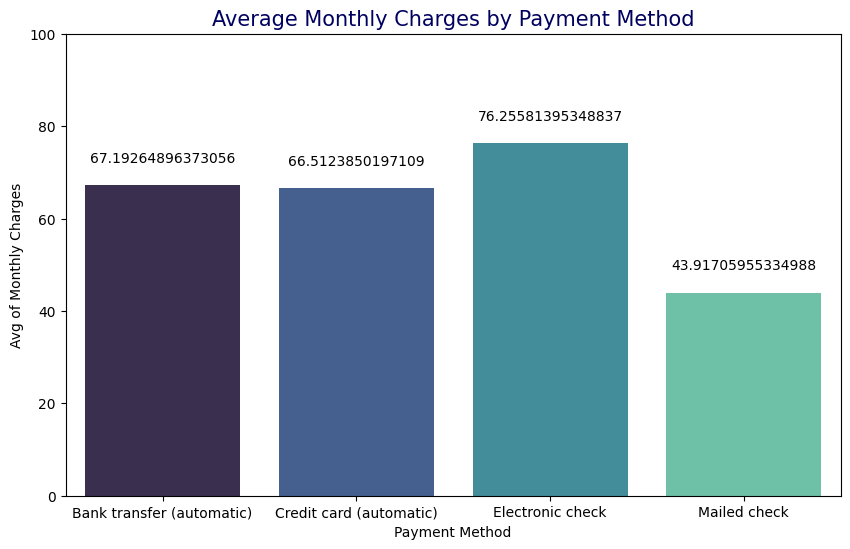

In [3]:
# your code goes here!

mean_mc = df_telco_cust.groupby('PaymentMethod')['MonthlyCharges'].mean().reset_index()
mean_mc

plt.figure(figsize=(10,6))
sns.barplot(x='PaymentMethod', y='MonthlyCharges', data=mean_mc, palette='mako')
plt.ylim(0, 100)
plt.title('Average Monthly Charges by Payment Method', fontsize=15, color='#00005f')
plt.xlabel('Payment Method')
plt.ylabel('Avg of Monthly Charges')
# plt.title('Average Monthly Charge per Mayment Method', fontsize=16)
numbers = range(len(mean_mc))
for i in numbers:
  plt.text(x=i, y=mean_mc['MonthlyCharges'][i]+5, s=mean_mc['MonthlyCharges'][i], ha='center')

plt.show()

Jadi, dari plot di atas, dapat disimpulkan bahwa Payment Method pada kategori **Electronic check** memiliki rata - rata MonthlyCharges paling tinggi, sebesar **76.256**

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## Bagaimana jumlah customer dilihat dari tenure group?

Tenure group:
- low_tenure: User dengan tenure < 21 hari
- medium_tenure: User dengan tenure 21 - 40 hari
- high_tenure: User dengan tenure > 40 hari

Hint:
- Memotong data integer menjadi group categorical dapat menggunakan beberapa macam cara, contohnya dengan numpy.where atau pandas.cut
- Mirip dengan plot pertama, namun ini menghitung jumlah unique users

In [4]:
# your code goes here!
import numpy as np

kategori = ['low tenure', 'medium tenure', 'high tenure']

tenure_filter = [
    (df_telco_cust['tenure'] < 21),
    (df_telco_cust['tenure'] >= 21) & (df_telco_cust['tenure'] <= 40),
    (df_telco_cust['tenure'] > 40)
]

df_telco_cust['tenure_group'] = pd.Series(pd.Categorical(np.select(tenure_filter, kategori), categories=kategori))
count_tenure = df_telco_cust.groupby('tenure_group')['customerID'].nunique()
count_tenure

tenure_group
low tenure       2878
medium tenure    1408
high tenure      2757
Name: customerID, dtype: int64

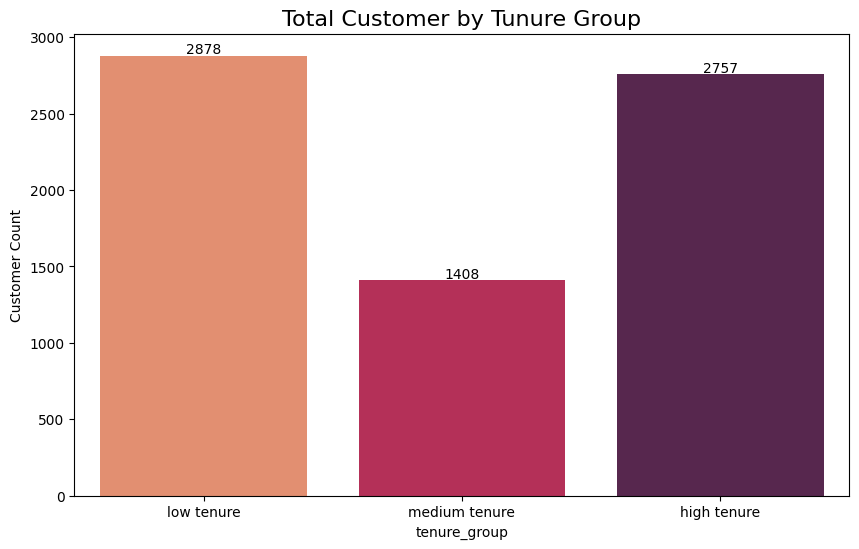

In [5]:
plt.figure(figsize=(10,6))
sns.barplot(x=count_tenure.index, y=count_tenure.values, palette='rocket_r')
plt.ylabel('Customer Count')
plt.title('Total Customer by Tunure Group', fontsize=16)

for i, v in enumerate(count_tenure.values):
    plt.text(i, v+13, str(v), ha='center')

plt.show()

Jadi, dari plot di atas, kami menyimpulkan bahwa jumlah customer terbanyak terdapat pada categori tenure **low tenure** atau user dengan tenure dibawah 21 hari . Dimana pada kategori ini terdapat **2878 customer**. Sedangkan jumlah customer terendah terdapat pada categori **medium tuner**e atau user dengan tenure antara 21 - 40 hari dan memiliki total **1408 customer**.

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## Apakah kebanyakan dari Senior Citizen berlangganan PhoneService?

Hint:
- Dapat menggunakan feature/input parameter hue pada seaborn
- Dalam menghitung jumlah unique customer, jangan lupa perhatikan angka rasio, tidak hanya angka absolutnya



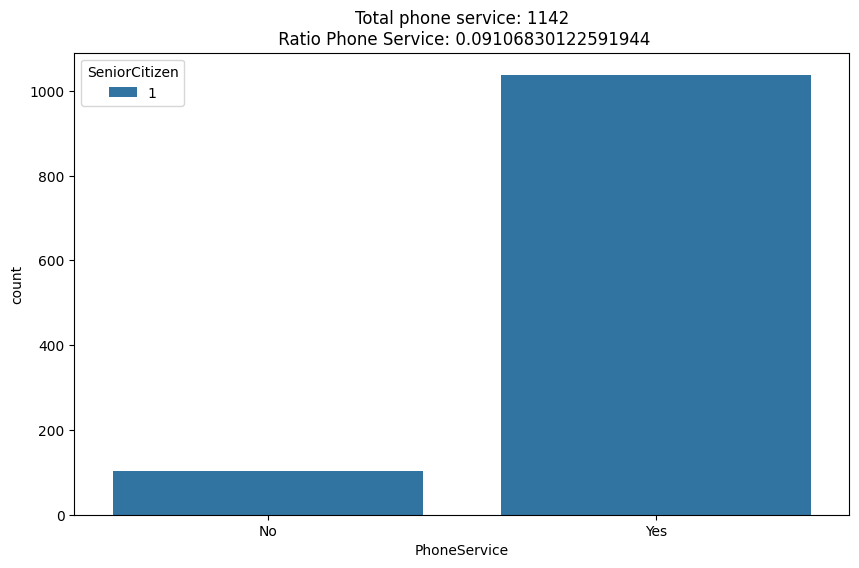

In [6]:
# your code goes here!
senior_service = df_telco_cust[df_telco_cust['SeniorCitizen'] == 1]

senior_phone_service = senior_service['PhoneService'].value_counts()

ratio_phone_service = senior_phone_service[1] / (senior_phone_service[0] + senior_phone_service[1])

plt.figure(figsize=(10,6))
sns.countplot(x='PhoneService',hue= 'SeniorCitizen', data=senior_service)
plt.title(f'Total phone service: {len(senior_service)}\n Ratio Phone Service: {ratio_phone_service}')

plt.show()

Jadi, dari plot di atas, dapat disimpulkan bahwa **kebanyakan senior citizen berlanggan phone service**. Dari total 1142 sebanyak 1038 senior citizen yang berlangganan phone service dengan rasio sebesar 0.091.

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## Bagaimana Distribusi dari TotalCharge?

Hint:
- Ubah datatype TotalCharge dari object ke int atau float
- Buat distribusi plot!

In [7]:
# your code goes here!
total_charge = df_telco_cust[df_telco_cust['TotalCharges'] != ' ']
total_charge

total_charge['TotalCharges'] = total_charge['TotalCharges'].astype('float64')
total_charge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   gender            7032 non-null   object  
 2   SeniorCitizen     7032 non-null   int64   
 3   Partner           7032 non-null   object  
 4   Dependents        7032 non-null   object  
 5   tenure            7032 non-null   int64   
 6   PhoneService      7032 non-null   object  
 7   MultipleLines     7032 non-null   object  
 8   InternetService   7032 non-null   object  
 9   OnlineSecurity    7032 non-null   object  
 10  OnlineBackup      7032 non-null   object  
 11  DeviceProtection  7032 non-null   object  
 12  TechSupport       7032 non-null   object  
 13  StreamingTV       7032 non-null   object  
 14  StreamingMovies   7032 non-null   object  
 15  Contract          7032 non-null   object  
 16  PaperlessBilling  7032 n

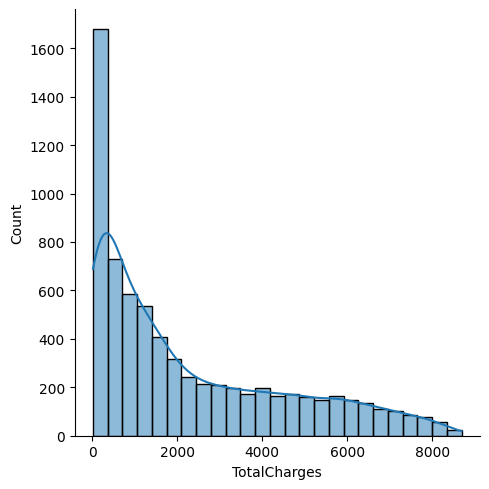

In [8]:
sns.displot(x='TotalCharges', data=total_charge, kde=True);

Jadi, dari plot di atas, dapat disimpulkan bahwa distribusi total charge menunjukkan positif skewed distribution. Dapa dilihat dari bentuk grafik yang miring ke kanan. Ini menujukka bahwa rata - rata dari total charges lebih besar daripada nilai mean dan modusnya sehingga bergerak ke arah kanan.

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

# Intermediate

## Apakah customer yang memiliki monthly charges yang tinggi cenderung churn?

Hint: dapat ditunjukan melalui distribusi data

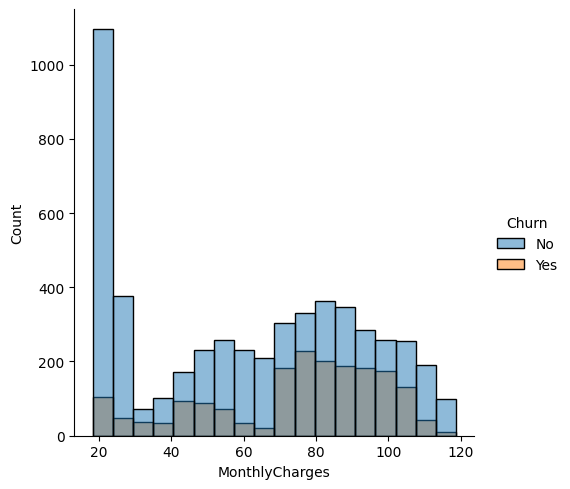

In [9]:
# your code goes here!
sns.displot(data=df_telco_cust, x='MonthlyCharges', hue='Churn')

Jadi, dari plot di atas, dapat disimpulkan bahwa apabila customer yang memiliki monthly charges tinggi cenderung tidak churn terlihat dari grafik menunjukkan bahwa tidak lebih dari setengah jumlah customer untuk setiap monthlycharges

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## Bagaimana pengaruh memiliki partner & dependents terhadap tingkat churn customer?

Hint: concat partner dan dependents, gunakan parameter 'hue' pada seaborn untuk mempermudah

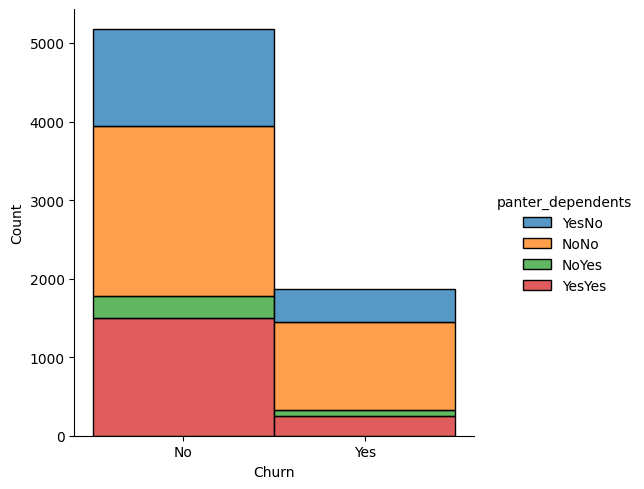

In [10]:
# your code goes here!
partner = df_telco_cust['Partner']
dependents = df_telco_cust['Dependents']
df_telco_cust['panter_dependents'] = pd.concat([partner + dependents])

sns.displot(data=df_telco_cust, x='Churn', hue='panter_dependents', multiple='stack')

Jadi, dari plot di atas, dapat disimpulkan bahwa partner dan dependents tidak mempengaruhi dari tingkat terjadinya chrun karena perbandingan persebaran data antara partner dan dependent hampir sama 

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

# Soal Hard

## Buatlah satu insight dari data telco customer, dan sertakan storyline pada visualisasi tersebut! dengan hanya memanfaatkan atribut PaymentMethod, CustomerID, dan Churn!

In [11]:
# your code goes here!
atribut = df_telco_cust[['PaymentMethod', 'customerID', 'Churn']]

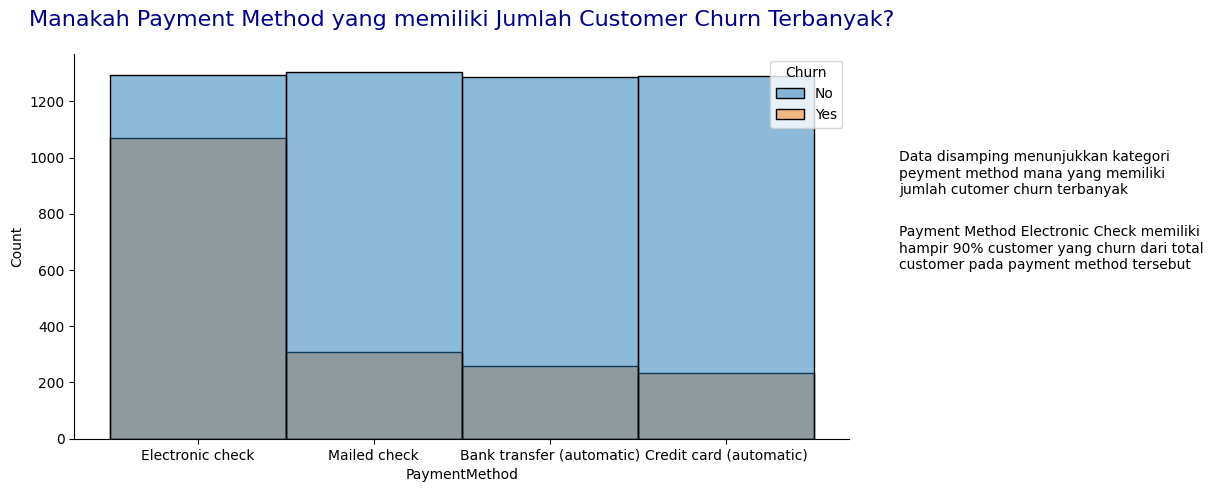

In [31]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=atribut, x='PaymentMethod', hue='Churn')
plt.title('Manakah Payment Method yang memiliki Jumlah Customer Churn Terbanyak?', fontsize=16, pad=20, color='DarkBlue')
fig.text(0.95, 0.6, 'Data disamping menunjukkan kategori \npeyment method mana yang memiliki \njumlah cutomer churn terbanyak')
fig.text(0.95, 0.45, 'Payment Method Electronic Check memiliki \nhampir 90% customer yang churn dari total \ncustomer pada payment method tersebut')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()